# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

Always start writing code without writing the code. First write out what you are doing. Think first. Never start writing code then start thinking. Always think first.

In [6]:
# theta needs to be in radians
# sin and cos are not part of phython

from math import sin, cos, pi, radians

we need the degrees to be in radians because sin and cosine utilize radians

In [7]:
sigmax = 12.
sigmay = -5.5
tau    =  3.5
theta = radians( 25. )

In [8]:
print(sigmax, sigmay, tau, theta)

12.0 -5.5 3.5 0.4363323129985824


In [31]:
sigmaxp = (sigmax*pow(cos(theta),2)) + (sigmay*pow(sin(theta),2)) + (2*tau*sin(theta)*cos(theta))
sigmayp = (sigmax*pow(sin(theta),2)) + (sigmay*pow(cos(theta),2)) - (2*tau*sin(theta)*cos(theta))
taup    = ((sigmay-sigmax)*sin(theta)*cos(theta)) + (tau*(pow(cos(theta),2) - pow(sin(theta),2)))

Can also do power by *'*. i.e. pow(x,y) = x*'*y. (there is no apostrophe, just getting unfunky formatting.

In [32]:
print(f"sigx'={sigmaxp:12.6f}, sigy'={sigmayp:.6f}, tau'={taup:.6f}")

sigx'=   11.555547, sigy'=-5.055547, tau'=-4.453132


We have print(f"string to be formatted") to help with having formatted strings. Can substitute values in strings with {}. .# where # is number of decimals. You can sub in variables inside of the {} if you put f at the beginnning (show it's a formatted string). 
f - floating
e = engineering format 

Spend a lot of time on thinking how to verify what you are doing is actually meaningful and correct.

### Exercise 2

Convert the calculation from exercise 1 to a function

In [33]:
def stressTransform(sigx, sigy, tauxy, theta):
    th = radians(theta)
    
    sx = (sigx*pow(cos(th),2)) + (sigy*pow(sin(th),2)) + (2*tauxy*sin(th)*cos(th))
    sy = (sigx*pow(sin(th),2)) + (sigy*pow(cos(th),2)) - (2*tauxy*sin(th)*cos(th))
    txy    = ((sigy-sigx)*sin(th)*cos(th)) + (tauxy*(pow(cos(th),2) - pow(sin(th),2)))
    
    return (sx,sy,txy)

To see what's in a funtion you have to have it such that everything with the same indentation is in the same level. So everything at the indentation is in the function.

It is important to look at the difference from local variables and global variables. Global variables are what exists in your actual code. Local variables only exist in the function.

Return in a list type of a tuple.

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [34]:
s1,s2,s3 = stressTransform(15., -15.5, 3.5, 0.0)

print(f"sigx'={s1:.6f}, sigy'={s2:.6f}, tau'={s3:.6f}")

sigx'=15.000000, sigy'=-15.500000, tau'=3.500000


In [35]:
sigmay

-5.5

In [36]:
stress = stressTransform(12., -5.5, 3.5, 0.0)

print(f"sigx'={stress[0]:.6f}, sigy'={stress[1]:.6f}, tau'={stress[2]:.6f}")

sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


In [37]:
stress

(12.0, -5.5, 3.5)

In [38]:
type(stress)

tuple

stress is saved as a tuple 

In [39]:
stress = stressTransform(12., -5.5, 3.5, 0.0)

print("sigx'={:.6f}, sigy'={:.6f}, tau'={:.6f}".format(*stress))

sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


We want it such that stress is an ordered variable and pull each one. Also, do not print in functions, unless it is a report.

We can actually save computational energy in functions by putting our repetitive costly functions and define them early, then post those in over and over. 

In [40]:
def stressTransform2(sigx, sigy, tauxy, theta):
    th = radians(theta)
    
    sn = sin(th)
    cs = cos(th)
    
    sx = (sigx*pow(cs,2)) + (sigy*pow(sn,2)) + (2*tauxy*sn*cs)
    sy = (sigx*pow(sn,2)) + (sigy*pow(cs,2)) - (2*tauxy*sn*cs)
    txy    = ((sigy-sigx)*sn*cs) + (tauxy*(pow(cs,2) - pow(sn,2)))
    
    return (sx,sy,txy)

In [41]:
stress = stressTransform2(12., -5.5, 3.5, 0.0)

print("sigx'={:.6f}, sigy'={:.6f}, tau'={:.6f}".format(*stress))

sigx'=12.000000, sigy'=-5.500000, tau'=3.500000


### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

We start with the clumsy way, will eventually move on to numpy. Add . to float values to make sure it is cast as a float.

In [55]:
# YOUR CODE for 1.

#initialize initial_th
initial_th = 0.

#initialize delta_th
delta_th = 180./80.

#Way 1
#initialize an empty list
th_values_0 = []

#loop 80 times and add an element to the list: theta_last + delta_th
for i in range(81):
    if i == 0:
        new_theta = initial_th
    else:
        new_theta = th_values_0[-1] + delta_th #-1 is the last one
    th_values_0.append(new_theta)

print(th_values_0)
print(len(th_values_0))

#or Way 2
th_values = [initial_th]

for i in range(80):
    th_values.append(th_values[-1] + delta_th)

print(th_values)
print(len(th_values))

#if wanted to, we could go in and print every single value.
for th in th_values:
    print(th)

[0.0, 2.25, 4.5, 6.75, 9.0, 11.25, 13.5, 15.75, 18.0, 20.25, 22.5, 24.75, 27.0, 29.25, 31.5, 33.75, 36.0, 38.25, 40.5, 42.75, 45.0, 47.25, 49.5, 51.75, 54.0, 56.25, 58.5, 60.75, 63.0, 65.25, 67.5, 69.75, 72.0, 74.25, 76.5, 78.75, 81.0, 83.25, 85.5, 87.75, 90.0, 92.25, 94.5, 96.75, 99.0, 101.25, 103.5, 105.75, 108.0, 110.25, 112.5, 114.75, 117.0, 119.25, 121.5, 123.75, 126.0, 128.25, 130.5, 132.75, 135.0, 137.25, 139.5, 141.75, 144.0, 146.25, 148.5, 150.75, 153.0, 155.25, 157.5, 159.75, 162.0, 164.25, 166.5, 168.75, 171.0, 173.25, 175.5, 177.75, 180.0]
81
[0.0, 2.25, 4.5, 6.75, 9.0, 11.25, 13.5, 15.75, 18.0, 20.25, 22.5, 24.75, 27.0, 29.25, 31.5, 33.75, 36.0, 38.25, 40.5, 42.75, 45.0, 47.25, 49.5, 51.75, 54.0, 56.25, 58.5, 60.75, 63.0, 65.25, 67.5, 69.75, 72.0, 74.25, 76.5, 78.75, 81.0, 83.25, 85.5, 87.75, 90.0, 92.25, 94.5, 96.75, 99.0, 101.25, 103.5, 105.75, 108.0, 110.25, 112.5, 114.75, 117.0, 119.25, 121.5, 123.75, 126.0, 128.25, 130.5, 132.75, 135.0, 137.25, 139.5, 141.75, 144.0, 1

In [54]:
# YOUR CODE for 2.
sigmax_values = []
sigmay_values = []
tauxy_values  = []

#do list with stress values for each theta
for th in th_values:
    s1,s2,s3 = stressTransform(12., -5.5, 3.5, th)

    sigmax_values.append(s1)
    sigmay_values.append(s2)
    tauxy_values.append(s3)

print(sigmax_values)
print(sigmay_values)
print(tauxy_values)

[12.0, 12.247633505212326, 12.439793607848262, 12.575295576975337, 12.653303997894911, 12.673337922751573, 12.635273835736632, 12.539346414604127, 12.386147083804444, 12.176620368155914, 11.912058069535206, 11.594091302489213, 11.224680437871456, 10.806103016503876, 10.340939707380324, 9.83205839698404, 9.282596507813828, 8.69594165513104, 8.075710761185002, 7.425727755684592, 6.750000000000002, 6.052693580447306, 5.338107622980962, 4.610647787652695, 3.8747991062522473, 3.13509833059497, 2.3961059619382534, 1.6623781339747699, 0.9384385227531764, 0.22875045671100258, -0.46231060122937295, -1.1304840298446277, -1.7716503177571332, -2.381856461592485, -2.957340337559804, -3.494553896195944, -3.990185037270277, -4.441178029984001, -4.844752352566648, -5.198419835117412, -5.5, -5.747633505212326, -5.939793607848263, -6.075295576975339, -6.15330399789491, -6.173337922751573, -6.135273835736633, -6.039346414604127, -5.886147083804446, -5.676620368155914, -5.412058069535207, -5.0940913024892

In [60]:
# YOUR CODE for 3.
# make a template string
template = "{:6.2f} | {:8.4f} | {:8.4f} | {:8.4f}"

#Clunkier way
for i in range(len(th_values)):
    print(template.format(th_values[i],sigmax_values[i],sigmay_values[i],tauxy_values[i]))

  0.00 |  12.0000 |  -5.5000 |   3.5000
  2.25 |  12.2476 |  -5.7476 |   2.8027
  4.50 |  12.4398 |  -5.9398 |   2.0881
  6.75 |  12.5753 |  -6.0753 |   1.3606
  9.00 |  12.6533 |  -6.1533 |   0.6248
 11.25 |  12.6733 |  -6.1733 |  -0.1149
 13.50 |  12.6353 |  -6.1353 |  -0.8539
 15.75 |  12.5393 |  -6.0393 |  -1.5876
 18.00 |  12.3861 |  -5.8861 |  -2.3116
 20.25 |  12.1766 |  -5.6766 |  -3.0212
 22.50 |  11.9121 |  -5.4121 |  -3.7123
 24.75 |  11.5941 |  -5.0941 |  -4.3805
 27.00 |  11.2247 |  -4.7247 |  -5.0217
 29.25 |  10.8061 |  -4.3061 |  -5.6319
 31.50 |  10.3409 |  -3.8409 |  -6.2073
 33.75 |   9.8321 |  -3.3321 |  -6.7446
 36.00 |   9.2826 |  -2.7826 |  -7.2402
 38.25 |   8.6959 |  -2.1959 |  -7.6912
 40.50 |   8.0757 |  -1.5757 |  -8.0948
 42.75 |   7.4257 |  -0.9257 |  -8.4484
 45.00 |   6.7500 |  -0.2500 |  -8.7500
 47.25 |   6.0527 |   0.4473 |  -8.9976
 49.50 |   5.3381 |   1.1619 |  -9.1898
 51.75 |   4.6106 |   1.8894 |  -9.3253
 54.00 |   3.8748 |   2.6252 |  -9.4033


In [64]:
# YOUR CODE for 3.
# make a template string
template = "{:6.2f}, {:8.4f}, {:8.4f}, {:8.4f}"

#Smoother way, zip is good when all have same length. 
#If not all same length then it automatically stops when first ends
for th,sx,sy,tau in zip(th_values,sigmax_values,sigmay_values,tauxy_values):
    print(template.format(th,sx,sy,tau))

  0.00,  12.0000,  -5.5000,   3.5000
  2.25,  12.2476,  -5.7476,   2.8027
  4.50,  12.4398,  -5.9398,   2.0881
  6.75,  12.5753,  -6.0753,   1.3606
  9.00,  12.6533,  -6.1533,   0.6248
 11.25,  12.6733,  -6.1733,  -0.1149
 13.50,  12.6353,  -6.1353,  -0.8539
 15.75,  12.5393,  -6.0393,  -1.5876
 18.00,  12.3861,  -5.8861,  -2.3116
 20.25,  12.1766,  -5.6766,  -3.0212
 22.50,  11.9121,  -5.4121,  -3.7123
 24.75,  11.5941,  -5.0941,  -4.3805
 27.00,  11.2247,  -4.7247,  -5.0217
 29.25,  10.8061,  -4.3061,  -5.6319
 31.50,  10.3409,  -3.8409,  -6.2073
 33.75,   9.8321,  -3.3321,  -6.7446
 36.00,   9.2826,  -2.7826,  -7.2402
 38.25,   8.6959,  -2.1959,  -7.6912
 40.50,   8.0757,  -1.5757,  -8.0948
 42.75,   7.4257,  -0.9257,  -8.4484
 45.00,   6.7500,  -0.2500,  -8.7500
 47.25,   6.0527,   0.4473,  -8.9976
 49.50,   5.3381,   1.1619,  -9.1898
 51.75,   4.6106,   1.8894,  -9.3253
 54.00,   3.8748,   2.6252,  -9.4033
 56.25,   3.1351,   3.3649,  -9.4233
 58.50,   2.3961,   4.1039,  -9.3853
 

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

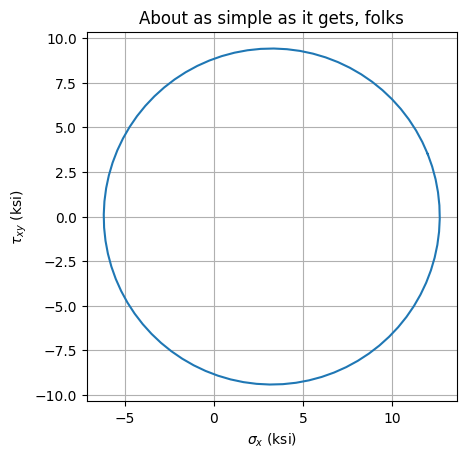

In [74]:
#import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(sigmax_values, tauxy_values)

ax.set(xlabel='$\\sigma_x$ (ksi)', ylabel='$\\tau_{xy}$ (ksi)',
       title='About as simple as it gets, folks')
ax.grid()
ax.set_aspect('equal')


# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show() #have to tell it to show

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [ ]:
def stressTransform(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    
    return stress2

## Homework questions

We can all learn from your questions!